In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from xgboost import XGBRegressor
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,recall_score
from sklearn.metrics import roc_auc_score,roc_curve,scorer,precision_score
from sklearn.metrics import f1_score

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df = pd.read_csv("../input/hr-analytics-job-change-of-data-scientists/aug_train.csv")

In [3]:
dt = df.copy()

In [4]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [5]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

## enrollee_id

In [6]:
df['enrollee_id'].head()

0     8949
1    29725
2    11561
3    33241
4      666
Name: enrollee_id, dtype: int64

In [7]:
df['enrollee_id'].isnull().sum()

0

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Enrollee ID')

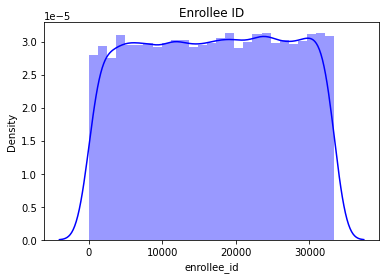

In [8]:
sns.distplot(df['enrollee_id'], color = 'blue')
plt.title('Enrollee ID')

In [9]:
df.drop(['enrollee_id'] ,axis= 1 , inplace = True)

## city

In [10]:
df['city'].head()

0    city_103
1     city_40
2     city_21
3    city_115
4    city_162
Name: city, dtype: object

In [11]:
df['city'].value_counts()

city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_111       3
city_121       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64

In [12]:
df['city'] = df['city'].astype('category')

In [13]:
df[['city' , 'city_development_index' , 'relevent_experience' , 'education_level' ,
'major_discipline' ,'experience' ,'training_hours']].head()

,city,city_development_index,relevent_experience,education_level,major_discipline,experience,training_hours
0,city_103,0.920,Has relevent experience,Graduate,STEM,>20,36
1,city_40,0.776,No relevent experience,Graduate,STEM,15,47
2,city_21,0.624,No relevent experience,Graduate,STEM,5,83
3,city_115,0.789,No relevent experience,Graduate,Business Degree,<1,52
4,city_162,0.767,Has relevent experience,Masters,STEM,>20,8


<AxesSubplot:>

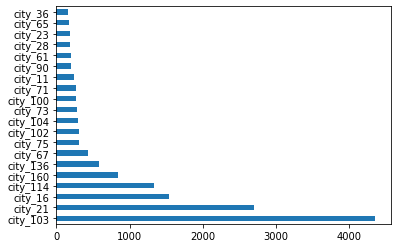

In [14]:
#the first 20 different values in cuty column
df['city'].value_counts()[:20].plot(kind='barh')

## city_development_index

In [15]:
df['city_development_index'].head()

0    0.920
1    0.776
2    0.624
3    0.789
4    0.767
Name: city_development_index, dtype: float64

In [16]:
df['city_development_index'].isnull().sum()

0

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'City Development Index')

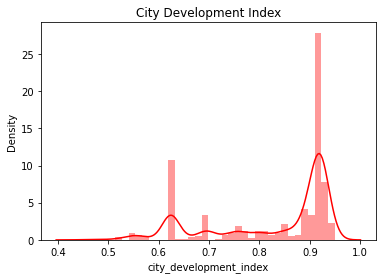

In [17]:
sns.distplot(df['city_development_index'], color = 'RED')
plt.title('City Development Index')

Text(0.5, 0, 'city_development_index')

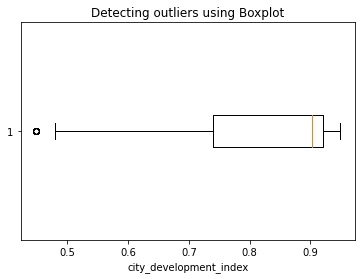

In [18]:
import matplotlib.pyplot as plt
plt.boxplot(df['city_development_index'], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('city_development_index')

In [19]:
df['city_development_index'].describe()

count    19158.000000
mean         0.828848
std          0.123362
min          0.448000
25%          0.740000
50%          0.903000
75%          0.920000
max          0.949000
Name: city_development_index, dtype: float64

## gender

In [20]:
df['gender'].head()

0    Male
1    Male
2     NaN
3     NaN
4    Male
Name: gender, dtype: object

In [21]:
df['gender'].value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

In [22]:
df['gender'].isnull().sum()

4508

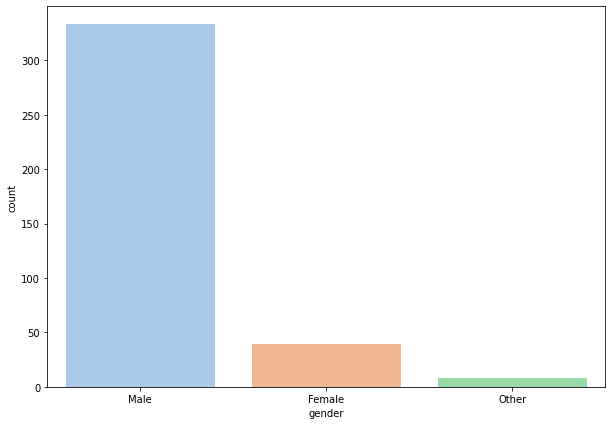

In [23]:
countplt, ax = plt.subplots(figsize = (10,7))
ax =sns.countplot(x='gender',data=df.head(500),  palette='pastel')

In [24]:
df['gender'] = df['gender'].fillna('Male')

In [25]:
df['gender'].isnull().sum()

0

In [26]:
df['gender'] = df['gender'].astype('category')

## relevent_experience

In [27]:
df['relevent_experience'].head()

0    Has relevent experience
1     No relevent experience
2     No relevent experience
3     No relevent experience
4    Has relevent experience
Name: relevent_experience, dtype: object

In [28]:
df['relevent_experience'].value_counts()

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

In [29]:
df['relevent_experience'].isnull().sum()

0

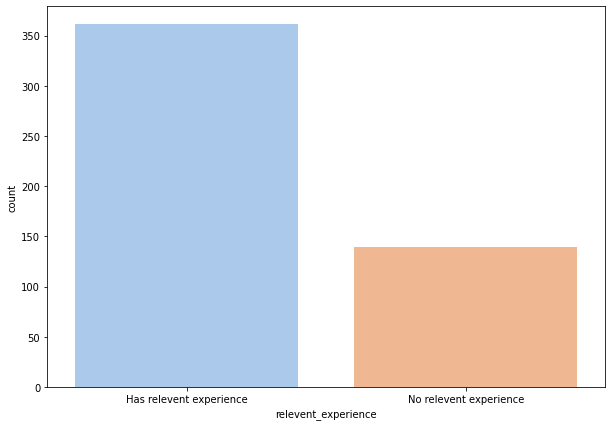

In [30]:
countplt, ax = plt.subplots(figsize = (10,7))
ax =sns.countplot(x='relevent_experience',data=df.head(500),  palette='pastel')

## enrolled_university

In [31]:
df['enrolled_university'].head()

0       no_enrollment
1       no_enrollment
2    Full time course
3                 NaN
4       no_enrollment
Name: enrolled_university, dtype: object

In [32]:
df['enrolled_university'].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [33]:
df['enrolled_university'].isnull().sum()

386

In [34]:
df['enrolled_university'].mode()

0    no_enrollment
dtype: object

In [35]:
df['enrolled_university'] = df['enrolled_university'].fillna('no_enrollment')

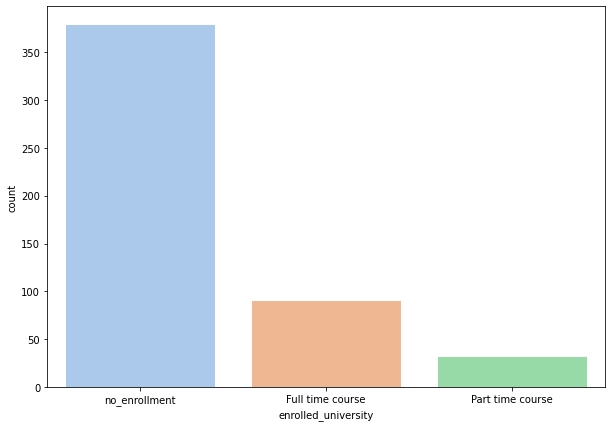

In [36]:
countplt, ax = plt.subplots(figsize = (10,7))
ax =sns.countplot(x='enrolled_university',data=df.head(500),  palette='pastel')

## education_level

In [37]:
df['education_level'].head()

0    Graduate
1    Graduate
2    Graduate
3    Graduate
4     Masters
Name: education_level, dtype: object

In [38]:
df['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [39]:
df['education_level'].isnull().sum()

460

In [40]:
df['education_level'].mode()

0    Graduate
dtype: object

In [41]:
df['education_level'] = df['education_level'].fillna('Graduate')

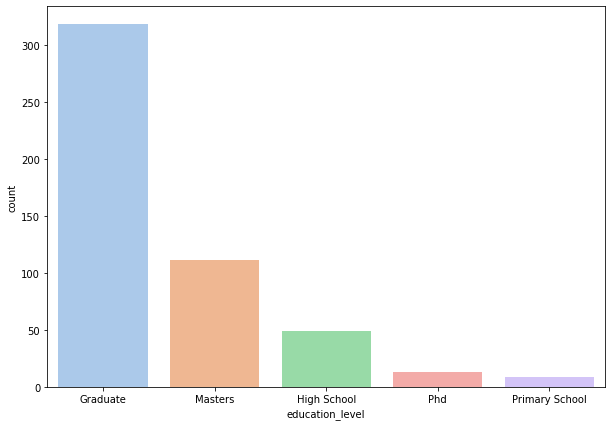

In [42]:
countplt, ax = plt.subplots(figsize = (10,7))
ax =sns.countplot(x='education_level',data=df.head(500),  palette='pastel')

## major_discipline

In [43]:
df['major_discipline'].head()

0               STEM
1               STEM
2               STEM
3    Business Degree
4               STEM
Name: major_discipline, dtype: object

In [44]:
df['major_discipline'].value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [45]:
df['major_discipline'].isnull().sum()

2813

In [46]:
df['major_discipline'].mode()

0    STEM
dtype: object

In [47]:
df['major_discipline'] = df['major_discipline'].fillna('STEM')

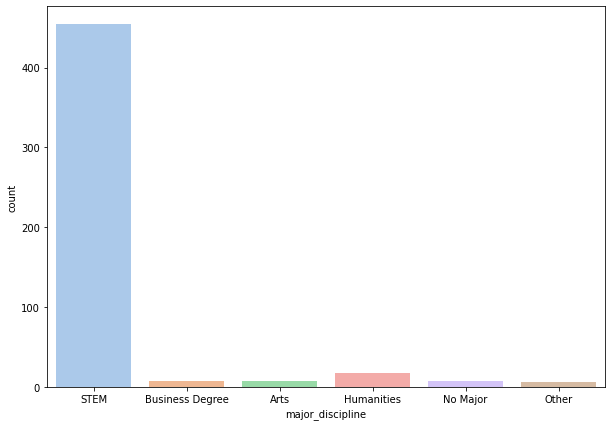

In [48]:
countplt, ax = plt.subplots(figsize = (10,7))
ax =sns.countplot(x='major_discipline',data=df.head(500),  palette='pastel')

## experience

In [49]:
df['experience'].head()

0    >20
1     15
2      5
3     <1
4    >20
Name: experience, dtype: object

In [50]:
df['experience'].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [51]:
df['experience'].isnull().sum()

65

In [52]:
df['experience'].mode()

0    >20
dtype: object

In [53]:
df['experience'] = df['experience'].fillna('>20')

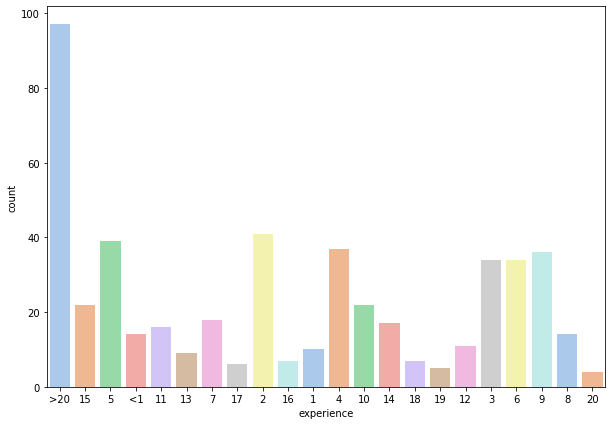

In [54]:
countplt, ax = plt.subplots(figsize = (10,7))
ax =sns.countplot(x='experience',data=df.head(500),  palette='pastel')

## company_size

In [55]:
df['company_size'].head()

0      NaN
1    50-99
2      NaN
3      NaN
4    50-99
Name: company_size, dtype: object

In [56]:
df['company_size'].isnull().sum()

5938

In [57]:
df['company_size'].value_counts()

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [58]:
df['company_size'].mode()

0    50-99
dtype: object

In [59]:
df['company_size'] = df['company_size'].fillna('50-99')

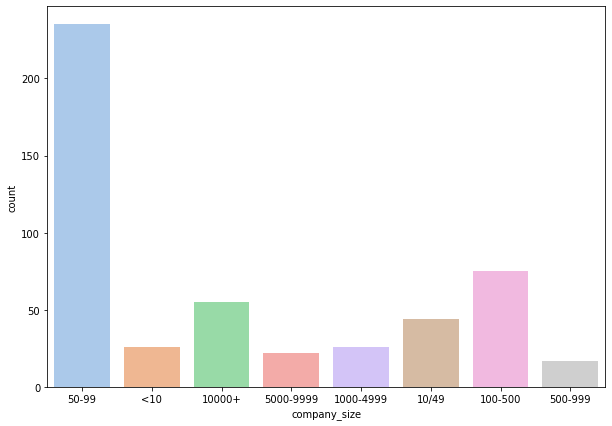

In [60]:
countplt, ax = plt.subplots(figsize = (10,7))
ax =sns.countplot(x='company_size',data=df.head(500),  palette='pastel')

## company_type

In [61]:
df['company_type'].head()

0               NaN
1           Pvt Ltd
2               NaN
3           Pvt Ltd
4    Funded Startup
Name: company_type, dtype: object

In [62]:
df['company_type'].value_counts()

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

In [63]:
df['company_type'].mode()

0    Pvt Ltd
dtype: object

In [64]:
df['company_type'].isnull().sum()

6140

In [65]:
df['company_type'] = df['company_type'].fillna('Pvt Ltd')

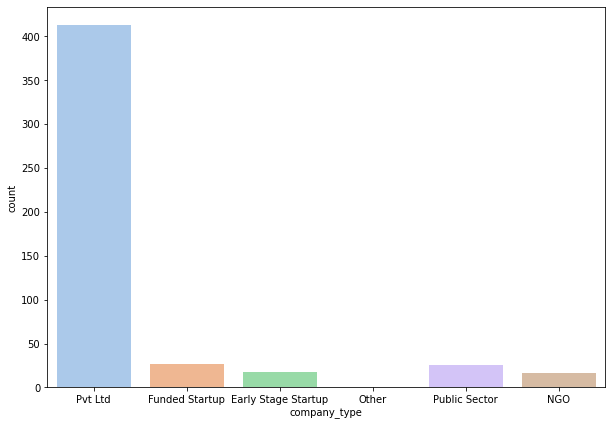

In [66]:
countplt, ax = plt.subplots(figsize = (10,7))
ax =sns.countplot(x='company_type',data=df.head(500),  palette='pastel')

## last_new_job

In [67]:
df['last_new_job'].head()

0        1
1       >4
2    never
3    never
4        4
Name: last_new_job, dtype: object

In [68]:
df['last_new_job'].value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

In [69]:
df['last_new_job'].mode()

0    1
dtype: object

In [70]:
df['last_new_job'].isnull().sum()

423

In [71]:
df['last_new_job'] = df['last_new_job'].fillna(1)

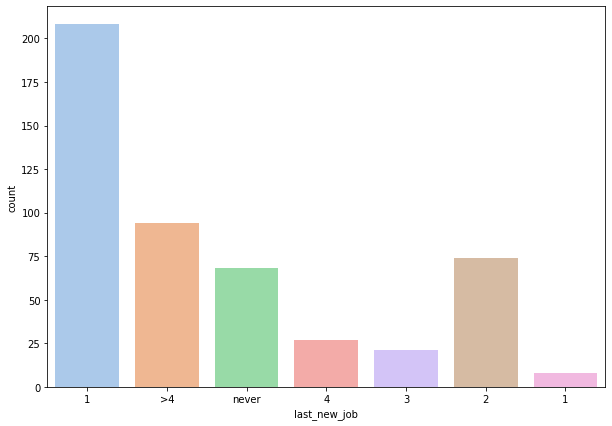

In [72]:
countplt, ax = plt.subplots(figsize = (10,7))
ax =sns.countplot(x='last_new_job',data=df.head(500),  palette='pastel')

## training_hours

In [73]:
df['training_hours'].head()

0    36
1    47
2    83
3    52
4     8
Name: training_hours, dtype: int64

In [74]:
df['training_hours'].value_counts()

28     329
12     292
18     291
22     282
50     279
      ... 
266      6
234      5
272      5
286      5
238      4
Name: training_hours, Length: 241, dtype: int64

In [75]:
df['training_hours'].mode()

0    28
dtype: int64

In [76]:
df['training_hours'].isnull().sum()

0

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Training Hours')

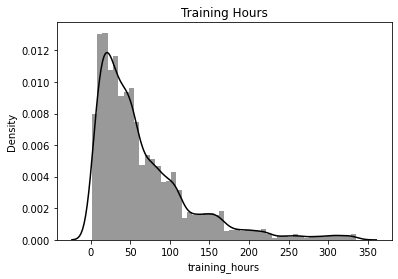

In [77]:
sns.distplot(df['training_hours'], color = 'BLACK')
plt.title('Training Hours')

<AxesSubplot:title={'center':'training_hours'}, xlabel='target'>

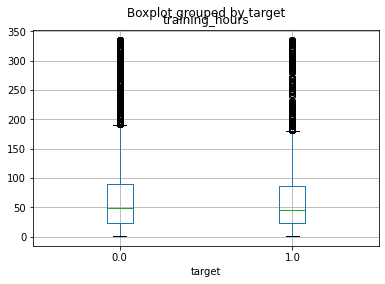

In [78]:
plt.show()
df.boxplot(column='training_hours', by='target')

## target

In [79]:
df['target'].head()

0    1.0
1    0.0
2    0.0
3    1.0
4    0.0
Name: target, dtype: float64

In [80]:
df['target'].value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

In [81]:
df['target'].mode()

0    0.0
dtype: float64

In [82]:
df['target'].isnull().sum()

0

In [83]:
df['target'] = df['target'].astype(int)

In [84]:
df['target'] = df['target'].astype('category')

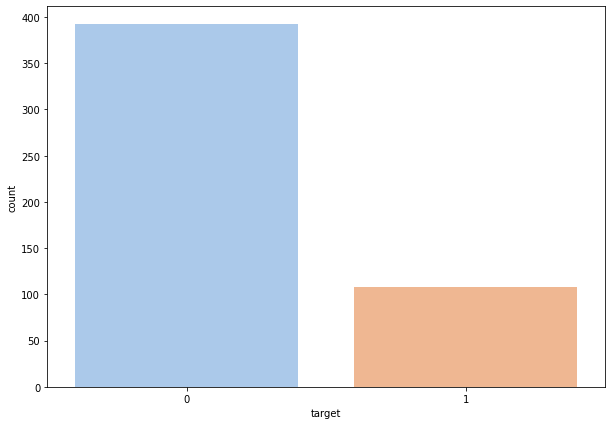

In [85]:
countplt, ax = plt.subplots(figsize = (10,7))
ax =sns.countplot(x='target',data=df.head(500),  palette='pastel')

In [86]:
import plotly.express as px
df1 = df.tail(100)
fig = px.sunburst(df1, path=["gender",'experience'],
                  color='education_level', hover_data=['target'],
                  color_continuous_scale='RdBu')
fig.show()

# Outliers

In [87]:
dt[['city' , 'city_development_index' , 'relevent_experience' , 'education_level' ,
'major_discipline' ,'experience' ,'training_hours']].head()

,city,city_development_index,relevent_experience,education_level,major_discipline,experience,training_hours
0,city_103,0.920,Has relevent experience,Graduate,STEM,>20,36
1,city_40,0.776,No relevent experience,Graduate,STEM,15,47
2,city_21,0.624,No relevent experience,Graduate,STEM,5,83
3,city_115,0.789,No relevent experience,Graduate,Business Degree,<1,52
4,city_162,0.767,Has relevent experience,Masters,STEM,>20,8


In [88]:
df[[ 'city_development_index' , 'training_hours' ]] = df[[ 'city_development_index' , 'training_hours' ]].astype(float)

In [89]:
features = df[[ 'city_development_index' , 'training_hours' ]]

#### Before Handel Outliers

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



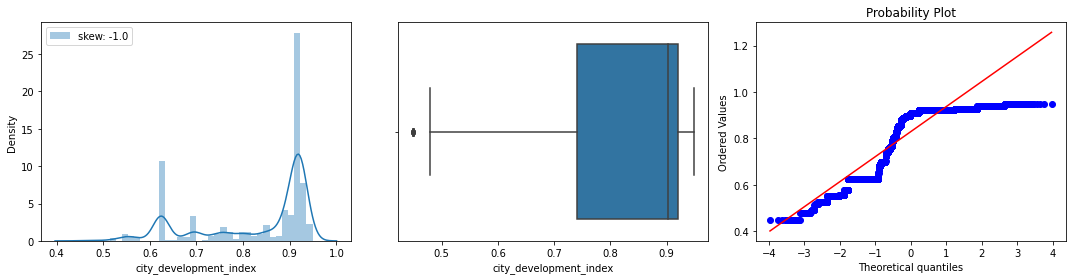

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



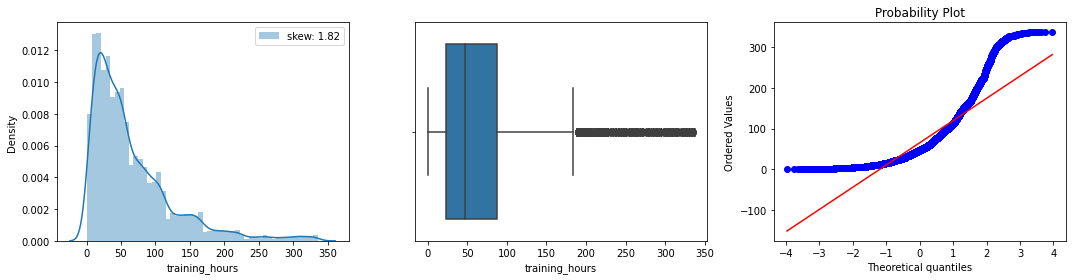

In [90]:
from scipy import stats
for col in features:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    stats.probplot(df[col], plot=plt)
    plt.tight_layout()
    plt.show()

In [91]:
mean = np.mean(features)
std = np.std(features)
print('mean of the dataset is', mean)
print('std. deviation is', std)

mean of the dataset is city_development_index     0.828848
training_hours            65.366896
dtype: float64
std. deviation is city_development_index     0.123359
training_hours            60.056894
dtype: float64


In [92]:
df = df.loc[df.city_development_index > 0.5]
df = df.loc[df.training_hours < 157]

#### After Handel Outliers

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



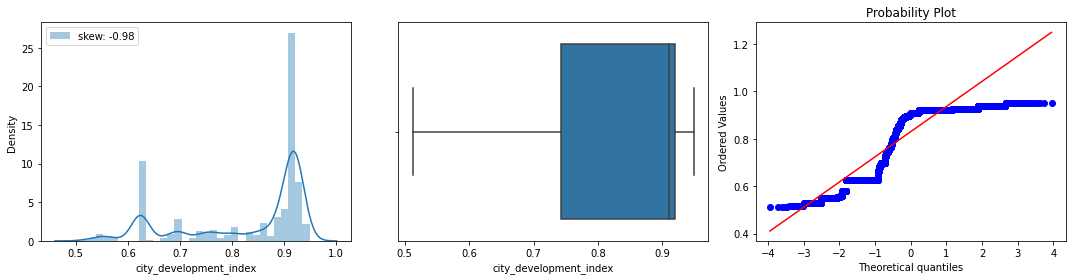

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



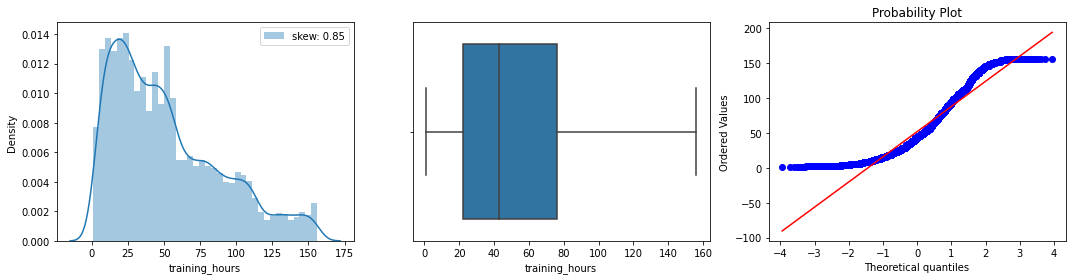

In [93]:
from scipy import stats
for col in features:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    stats.probplot(df[col], plot=plt)
    plt.tight_layout()
    plt.show()

# Label Encoding

In [94]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [95]:
df.dtypes

city                      category
city_development_index     float64
gender                    category
relevent_experience         object
enrolled_university         object
education_level             object
major_discipline            object
experience                  object
company_size                object
company_type                object
last_new_job                object
training_hours             float64
target                    category
dtype: object

In [96]:
df[['city' , 'gender' , 'relevent_experience' ,'enrolled_university' , 'education_level' , 'major_discipline' , 'experience' , 'company_size' ,'company_type' , 'last_new_job']].head()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
0,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
1,city_40,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4
2,city_21,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never
3,city_115,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never
4,city_162,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4


In [97]:
df['city'] = df['city'].astype('str')
df['target'] = df['target'].astype(int)
df['target'] = df['target'].astype('str')

In [98]:
df.dtypes

city                        object
city_development_index     float64
gender                    category
relevent_experience         object
enrolled_university         object
education_level             object
major_discipline            object
experience                  object
company_size                object
company_type                object
last_new_job                object
training_hours             float64
target                      object
dtype: object

In [99]:
df[['city' , 'gender' , 'relevent_experience']] = df[['city' , 'gender' , 'relevent_experience']].apply(LabelEncoder().fit_transform)

In [100]:
df[['education_level' , 'major_discipline' , 'experience' ]] = df[['education_level' , 'major_discipline' , 'experience' ]].apply(LabelEncoder().fit_transform)

In [101]:
df['company_size'].value_counts()

50-99        8246
100-500      2365
10000+       1849
10/49        1336
1000-4999    1223
<10          1198
500-999       796
5000-9999     512
Name: company_size, dtype: int64

In [102]:
df.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,5,0.920,1,0,no_enrollment,0,5,21,50-99,Pvt Ltd,1,36.0,1
1,73,0.776,1,1,no_enrollment,0,5,6,50-99,Pvt Ltd,>4,47.0,0
2,61,0.624,1,1,Full time course,0,5,15,50-99,Pvt Ltd,never,83.0,0
3,14,0.789,1,1,no_enrollment,0,1,20,50-99,Pvt Ltd,never,52.0,1
4,48,0.767,1,0,no_enrollment,2,5,21,50-99,Funded Startup,4,8.0,0


In [103]:
df[['company_size' , 'last_new_job']].dtypes

company_size    object
last_new_job    object
dtype: object

In [104]:
df['company_size'] = le.fit_transform(df.company_size.values)
df['enrolled_university'] = le.fit_transform(df.company_size.values)
df['company_type'] = le.fit_transform(df.company_size.values)

In [105]:
df['last_new_job'] = le.fit_transform(df['last_new_job'].astype(str))

In [106]:
df['last_new_job'].head()

0    0
1    4
2    5
3    5
4    3
Name: last_new_job, dtype: int64

In [107]:
df['last_new_job'].value_counts()

0    7740
4    3029
1    2651
5    2228
3     943
2     934
Name: last_new_job, dtype: int64

In [108]:
df.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,5,0.920,1,0,4,0,5,21,4,4,0,36.0,1
1,73,0.776,1,1,4,0,5,6,4,4,4,47.0,0
2,61,0.624,1,1,4,0,5,15,4,4,5,83.0,0
3,14,0.789,1,1,4,0,1,20,4,4,5,52.0,1
4,48,0.767,1,0,4,2,5,21,4,4,3,8.0,0


## Normalization

In [109]:
df[['city_development_index' , 'training_hours']].describe()

,city_development_index,training_hours
count,17525.000000,17525.000000
mean,0.830111,51.733752
std,0.121786,37.520617
min,0.512000,1.000000
25%,0.742000,22.000000
50%,0.910000,43.000000
75%,0.920000,76.000000
max,0.949000,156.000000


In [110]:
cols_to_norm = ['city_development_index' , 'training_hours']
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

## Modeling (Before Balance Data)

In [111]:
df_test = pd.read_csv("../input/hr-analytics-job-change-of-data-scientists/aug_test.csv")

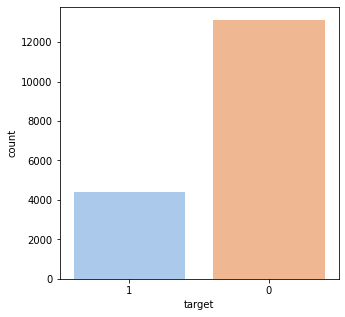

In [112]:
countplt, ax = plt.subplots(figsize = (5,5))
ax =sns.countplot(x='target',data=df,  palette='pastel')

In [113]:
X1 = df.drop(columns=['target'] , axis=1 )
y1 = df['target']

In [114]:
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.25,random_state=0)

In [115]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
classifiers = ['LinearSVM', 'RadialSVM', 
               'Logistic',  'RandomForest', 
               'KNeighbors','DecisionTree', 
               'GradientBoosting']

models = [svm.SVC(kernel='linear'),
          svm.SVC(kernel='rbf'),
          LogisticRegression(max_iter = 1000),
          RandomForestClassifier(n_estimators=200, random_state=0),
          DecisionTreeClassifier(random_state=0),
          KNeighborsClassifier(),
          GradientBoostingClassifier(random_state=0)]

In [116]:
from sklearn.model_selection import train_test_split
def split(df,label):
    X_tr, X_te, Y_tr, Y_te = train_test_split(df, label, test_size=0.25, random_state=42)
    return X_tr, X_te, Y_tr, Y_te

def acc_score(df,label):
    Score = pd.DataFrame({"Classifier":classifiers})
    j = 0
    acc = []
    X_train,X_test,Y_train,Y_test = split(df,label)
    for i in models:
        model = i
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        acc.append(accuracy_score(Y_test,predictions))
        j = j+1     
    Score["Accuracy"] = acc
    Score.sort_values(by="Accuracy", ascending=False,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    return Score

In [117]:
new_data = df[["training_hours","city_development_index"]]

In [118]:
pred = df['target']
acc_score(new_data,pred)

,Classifier,Accuracy
0,Logistic,0.784117
1,GradientBoosting,0.781607
2,RadialSVM,0.780922
3,LinearSVM,0.753994
4,RandomForest,0.744637
5,DecisionTree,0.743953
6,KNeighbors,0.741442


## Modeling (After Balance Data)

In [119]:
X2 = df.drop(columns=['target'] , axis=1 )
y2 = df['target']

In [120]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.25,random_state=0)

In [121]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

X2 = df.drop(columns=['target'] , axis=1 )
y2 = df['target']

# summarize class distribution
counter = Counter(y2)
print(counter)


# transform the dataset
oversample = SMOTE()
X2, y2 = oversample.fit_resample(X2, y2)

# summarize the new class distribution
counter = Counter(y2)
print(counter)

Counter({'0': 13123, '1': 4402})
Counter({'1': 13123, '0': 13123})


In [122]:
df_New = pd.concat([X2, y2], axis=1)

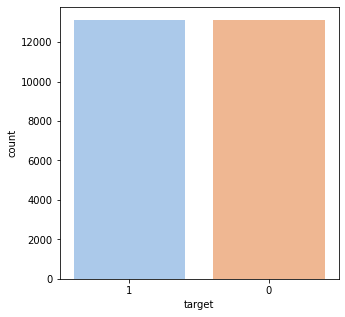

In [123]:
countplt, ax = plt.subplots(figsize = (5,5))
ax =sns.countplot(x='target',data=df_New,  palette='pastel')

In [124]:
from sklearn.model_selection import train_test_split
def split(df_New,label):
    X_tr, X_te, Y_tr, Y_te = train_test_split(df_New, label, test_size=0.25, random_state=42)
    return X_tr, X_te, Y_tr, Y_te

def acc_score(df,label):
    Score = pd.DataFrame({"Classifier":classifiers})
    j = 0
    acc = []
    X_train,X_test,Y_train,Y_test = split(df_New,label)
    for i in models:
        model = i
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        acc.append(accuracy_score(Y_test,predictions))
        j = j+1     
    Score["Accuracy"] = acc
    Score.sort_values(by="Accuracy", ascending=False,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    return Score

In [125]:
pred = df_New['target']
acc_score(new_data,pred)

,Classifier,Accuracy
0,LinearSVM,1.000000
1,RadialSVM,1.000000
2,Logistic,1.000000
3,RandomForest,1.000000
4,KNeighbors,1.000000
5,GradientBoosting,1.000000
6,DecisionTree,0.891801
